In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data=r"C:\Users\MSİ\OneDrive\Masaüstü\musteri_kaybi"

In [3]:
#Egitim (train)data
train_file=os.path.join(data,"cell2celltrain.csv")
df_train=pd.read_csv(train_file)

#test data
test_file=os.path.join(data,"cell2cellholdout.csv")
df_holdout=pd.read_csv(test_file)

print("Egitim veri seti boyutu",df_train.shape)
print("Test veri seti boyutu",df_holdout.shape)

Egitim veri seti boyutu (51047, 58)
Test veri seti boyutu (20000, 58)


In [4]:
df=df_train.copy()

In [5]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [7]:
# 2. Tekrar Eden Kayıtların Analizi
print("2.1 Tüm Sütunlarda Tekrar Eden Kayıtlar:")
print("-"*50)
duplicates = df_train.duplicated().sum()
print(f"Toplam Tekrar Eden Kayıt Sayısı: {duplicates}")
print(f"Tekrar Eden Kayıt Yüzdesi: {(duplicates/len(df_train)*100):.2f}%")

print("\n2.2 Sütunlara Göre Tekrar Eden Değerler:")
print("-"*50)
for col in df_train.columns:
    n_unique = df_train[col].nunique()
    n_duplicates = len(df_train) - n_unique
    dup_percentage = (n_duplicates/len(df_train)*100)
    print(f"{col:25}: {n_unique:,} benzersiz değer, {dup_percentage:.2f}% tekrar oranı")

2.1 Tüm Sütunlarda Tekrar Eden Kayıtlar:
--------------------------------------------------
Toplam Tekrar Eden Kayıt Sayısı: 0
Tekrar Eden Kayıt Yüzdesi: 0.00%

2.2 Sütunlara Göre Tekrar Eden Değerler:
--------------------------------------------------
CustomerID               : 51,047 benzersiz değer, 0.00% tekrar oranı
Churn                    : 2 benzersiz değer, 100.00% tekrar oranı
MonthlyRevenue           : 12,665 benzersiz değer, 75.19% tekrar oranı
MonthlyMinutes           : 2,719 benzersiz değer, 94.67% tekrar oranı
TotalRecurringCharge     : 214 benzersiz değer, 99.58% tekrar oranı
DirectorAssistedCalls    : 146 benzersiz değer, 99.71% tekrar oranı
OverageMinutes           : 746 benzersiz değer, 98.54% tekrar oranı
RoamingCalls             : 530 benzersiz değer, 98.96% tekrar oranı
PercChangeMinutes        : 2,262 benzersiz değer, 95.57% tekrar oranı
PercChangeRevenues       : 2,899 benzersiz değer, 94.32% tekrar oranı
DroppedCalls             : 285 benzersiz değer, 99.44% te

In [8]:
# Sayısal ve kategorik sütunları belirle
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_train.select_dtypes(exclude=[np.number]).columns.tolist()

print("Sayısal sütun sayısı:", len(numeric_cols))
print("Kategorik sütun sayısı:", len(categorical_cols))

print("\n🔸 Sayısal sütun örnekleri:")
print(numeric_cols[:10])

print("\n🔹 Kategorik sütun örnekleri:")
print(categorical_cols[:10])

Sayısal sütun sayısı: 35
Kategorik sütun sayısı: 23

🔸 Sayısal sütun örnekleri:
['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls']

🔹 Kategorik sütun örnekleri:
['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers']


In [9]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.00,3201534.00,3305376.000,3399994.00
MonthlyRevenue,50891.0,5.883449e+01,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,5.256534e+02,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,4.683009e+01,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,8.952290e-01,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,4.002778e+01,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244e+00,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-1.154791e+01,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985e+00,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50
DroppedCalls,51047.0,6.011489e+00,9.043955,0.00,0.70,3.00,7.700,221.70


In [10]:
# Kayıp (Null/NaN) değerlerin sayısını hesaplama
missing_counts = df_train.isnull().sum()
print(missing_counts)

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [11]:
total_rows=len(df_train)
missing_percentage=(missing_counts[missing_counts>0]/total_rows)*100

missing_data_summary = pd.DataFrame({
    'Kayıp Sayısı': missing_counts[missing_counts > 0],
    'Kayıp Yüzdesi (%)': missing_percentage.round(2)
}).sort_values(by='Kayıp Yüzdesi (%)', ascending=False)

print(missing_data_summary)

                       Kayıp Sayısı  Kayıp Yüzdesi (%)
AgeHH2                          909               1.78
AgeHH1                          909               1.78
PercChangeRevenues              367               0.72
PercChangeMinutes               367               0.72
MonthlyRevenue                  156               0.31
MonthlyMinutes                  156               0.31
RoamingCalls                    156               0.31
OverageMinutes                  156               0.31
DirectorAssistedCalls           156               0.31
TotalRecurringCharge            156               0.31
ServiceArea                      24               0.05
Handsets                          1               0.00
CurrentEquipmentDays              1               0.00
HandsetModels                     1               0.00


In [12]:

# Kategorik sütun: mode ile doldur
df_train['ServiceArea'] = df_train['ServiceArea'].fillna(df_train['ServiceArea'].mode()[0])
df_holdout['ServiceArea'] = df_holdout['ServiceArea'].fillna(df_train['ServiceArea'].mode()[0])

# Sayısal sütunlar: mean ile doldur
num_cols_to_fill = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
    'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
    'PercChangeMinutes', 'PercChangeRevenues',
    'AgeHH1', 'AgeHH2',
    'Handsets', 'HandsetModels', 'CurrentEquipmentDays'
]

for col in num_cols_to_fill:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
    df_holdout[col] = df_holdout[col].fillna(df_train[col].mean())

# Kontrol
print("Kalan eksik değer sayısı:", df_train.isnull().sum().sum())

Kalan eksik değer sayısı: 0


In [13]:
from sklearn.preprocessing import LabelEncoder

# Hedef değişkeni (Churn): Yes/No → 1/0
df_train['Churn'] = df_train['Churn'].map({'Yes': 1, 'No': 0})
df_holdout['Churn'] = df_holdout['Churn'].map({'Yes': 1, 'No': 0})

# Kategorik sütunları bul
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print("Dönüştürülecek kategorik sütunlar:", categorical_cols)

# Label Encoding (train + holdout birlikte)
for col in categorical_cols:
    le = LabelEncoder()
    combined = pd.concat([df_train[col], df_holdout[col]], axis=0).astype(str)
    le.fit(combined)
    df_train[col] = le.transform(df_train[col].astype(str))
    df_holdout[col] = le.transform(df_holdout[col].astype(str))

print("\n✅ Kodlama tamamlandı, artık tüm veriler sayısal.")
print(df_train.dtypes.head(10))

Dönüştürülecek kategorik sütunlar: ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

✅ Kodlama tamamlandı, artık tüm veriler sayısal.
CustomerID                 int64
Churn                      int64
MonthlyRevenue           float64
MonthlyMinutes           float64
TotalRecurringCharge     float64
DirectorAssistedCalls    float64
OverageMinutes           float64
RoamingCalls             float64
PercChangeMinutes        float64
PercChangeRevenues       float64
dtype: object


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [15]:
if 'CustomerID' in df.columns:
    df=df.drop(columns=['CustomerID'])
    print("Customer ID kaldirildi")

Customer ID kaldirildi


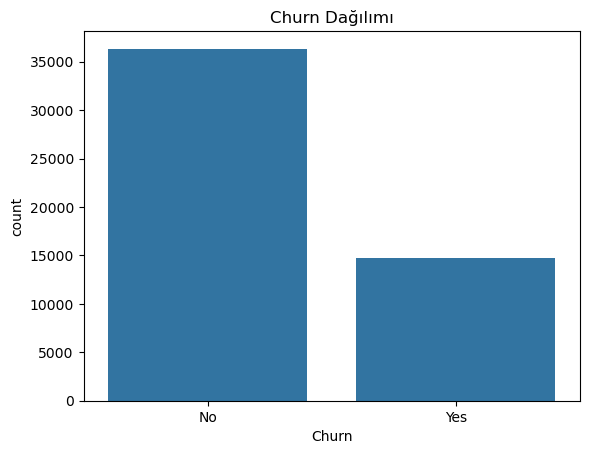

In [16]:
sns.countplot(x='Churn', data=df_train)
plt.xticks([0,1], ['No','Yes'])
plt.title('Churn Dağılımı')
plt.show()

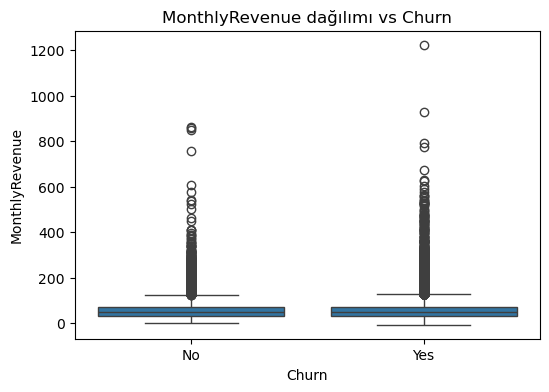

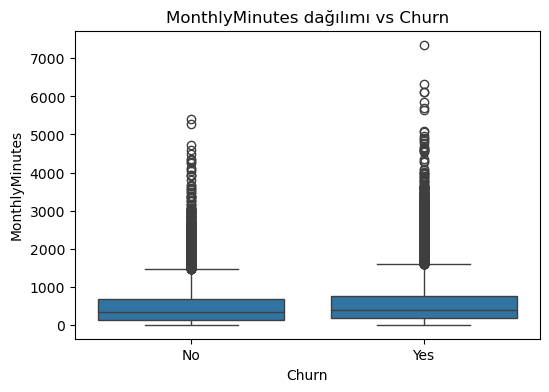

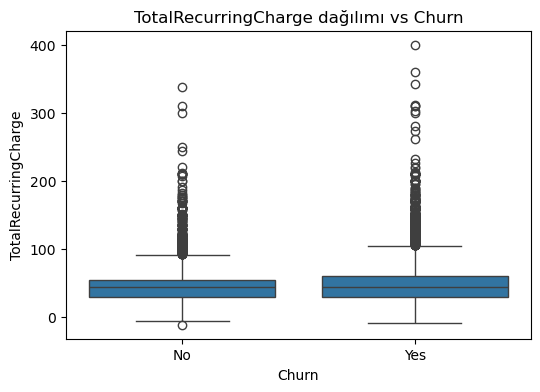

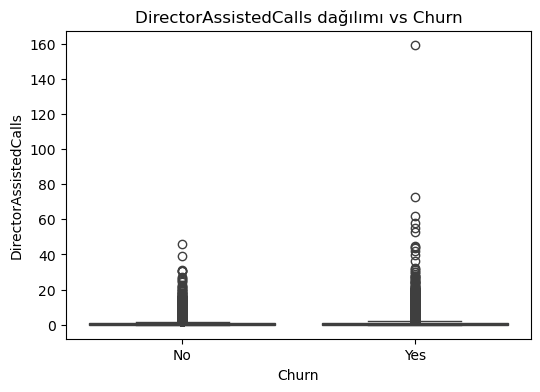

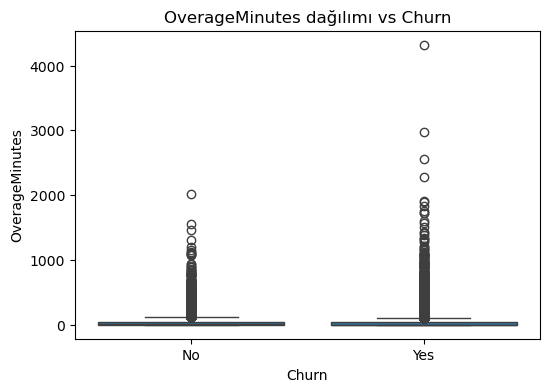

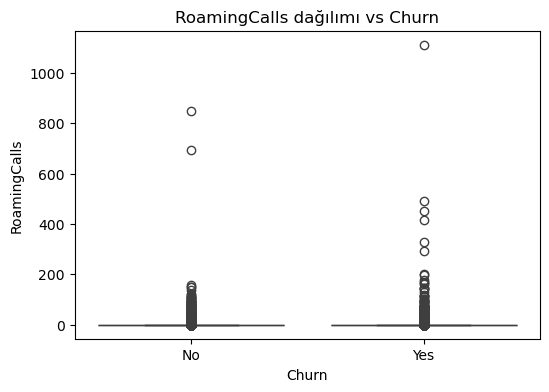

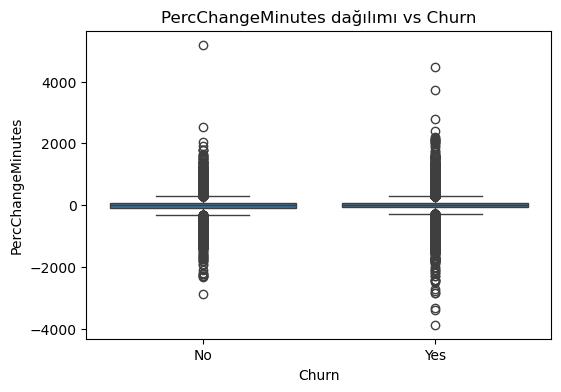

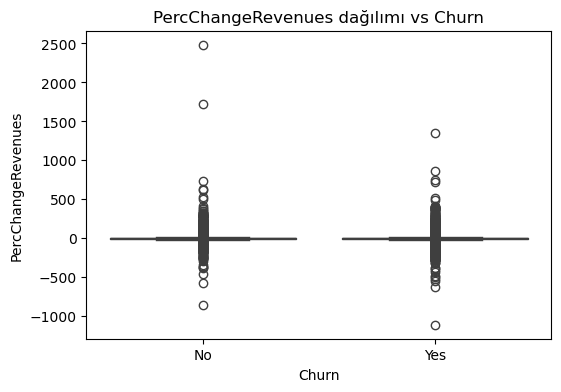

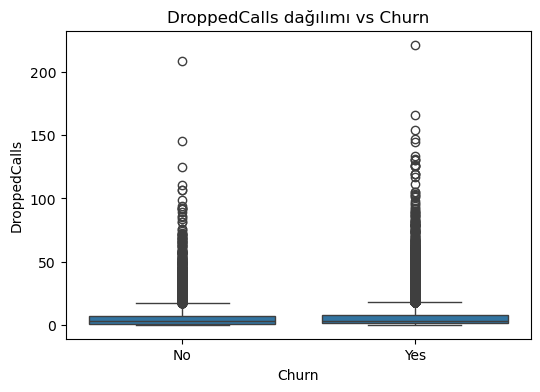

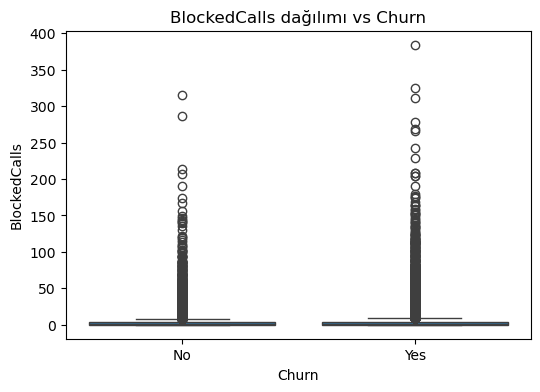

In [17]:
# Churn sütunu hariç tüm sayısal sütunları seç
num_cols_sample = [col for col in df.columns if col != 'Churn']

for col in num_cols_sample[:10]:  # ilk 10 değişkeni görselleştirelim
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} dağılımı vs Churn')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

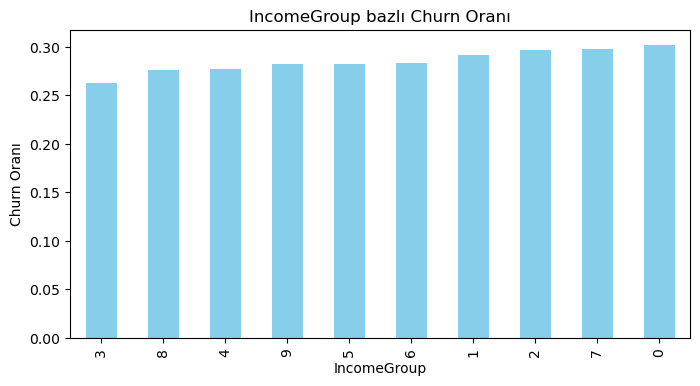

In [18]:
income_churn = df_train.groupby('IncomeGroup')['Churn'].mean().sort_values()
income_churn.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.ylabel('Churn Oranı')
plt.title('IncomeGroup bazlı Churn Oranı')
plt.show()

C:\Users\MSİ\AppData\Local\Temp\ipykernel_28212\730944093.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)



🔹 Test Set Performansı
Accuracy: 80.88%
F1-Score: 79.24%

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      7268
           1       0.87      0.73      0.79      7267

    accuracy                           0.81     14535
   macro avg       0.82      0.81      0.81     14535
weighted avg       0.82      0.81      0.81     14535



C:\Users\MSİ\AppData\Local\Temp\ipykernel_28212\730944093.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.head(30).index, y=feat_importance.head(30).values, palette='magma')


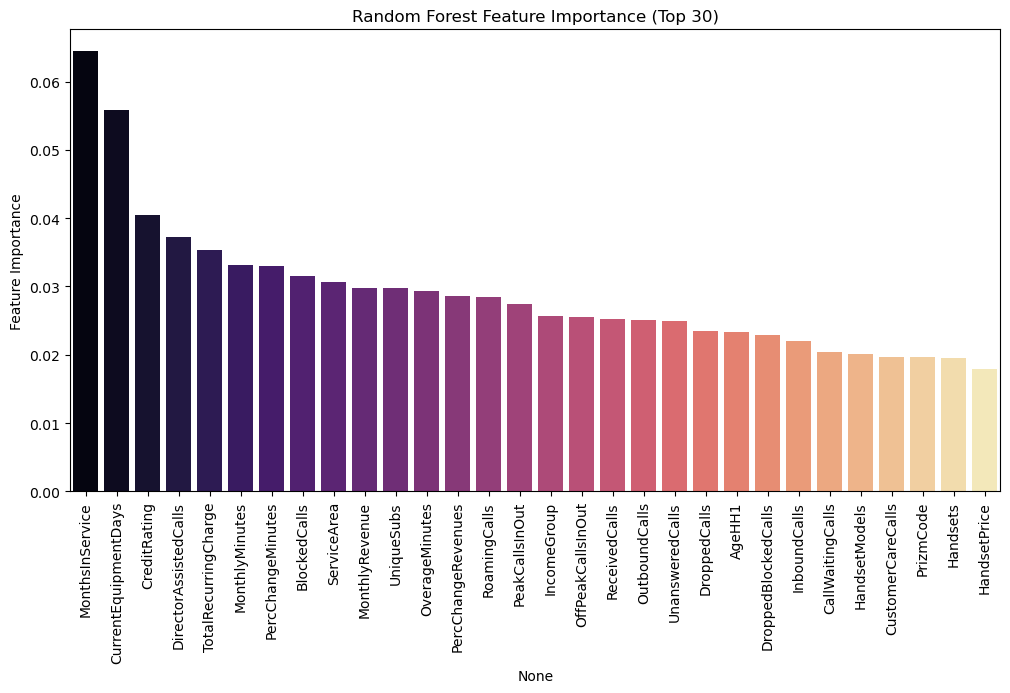


🔹 En Önemli 30 Özellik (Liste Şeklinde):
1. MonthsInService — importance: 0.06442
2. CurrentEquipmentDays — importance: 0.05579
3. CreditRating — importance: 0.04053
4. DirectorAssistedCalls — importance: 0.03718
5. TotalRecurringCharge — importance: 0.03529
6. MonthlyMinutes — importance: 0.03320
7. PercChangeMinutes — importance: 0.03300
8. BlockedCalls — importance: 0.03159
9. ServiceArea — importance: 0.03066
10. MonthlyRevenue — importance: 0.02975
11. UniqueSubs — importance: 0.02973
12. OverageMinutes — importance: 0.02933
13. PercChangeRevenues — importance: 0.02859
14. RoamingCalls — importance: 0.02843
15. PeakCallsInOut — importance: 0.02741
16. IncomeGroup — importance: 0.02563
17. OffPeakCallsInOut — importance: 0.02557
18. ReceivedCalls — importance: 0.02528
19. OutboundCalls — importance: 0.02508
20. UnansweredCalls — importance: 0.02492
21. DroppedCalls — importance: 0.02351
22. AgeHH1 — importance: 0.02338
23. DroppedBlockedCalls — importance: 0.02293
24. InboundCalls

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# 🔹 1️⃣ Veri Hazırlığı
X = df_train.drop(columns=['Churn', 'CustomerID'])
y = df_train['Churn']

# 🔹 2️⃣ Eksik verileri doldurma
for col in X.columns:
    if X[col].dtype == 'object':
        X[col].fillna(X[col].mode()[0], inplace=True)
    else:
        X[col].fillna(X[col].median(), inplace=True)

# 🔹 3️⃣ Kategorik verileri dönüştür
X = pd.get_dummies(X, drop_first=True)

# 🔹 4️⃣ Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 🔹 5️⃣ SMOTE ile sınıf dengesini sağla
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# 🔹 6️⃣ Eğitim/Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# 🔹 7️⃣ Random Forest modeli (optimize edilmiş ve hızlı)
rf = RandomForestClassifier(
    n_estimators=500,        # Ağaç sayısı (yüksek doğruluk için artırıldı)
    max_depth=20,            # Daha derin ağaçlar
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 🔹 8️⃣ Performans Sonuçları
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n🔹 Test Set Performansı")
print(f"Accuracy: {acc*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# 🔹 9️⃣ Feature Importance Hesaplama
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# 🔹 10️⃣ Görsel tablo (Top 30)
plt.figure(figsize=(12,6))
sns.barplot(x=feat_importance.head(30).index, y=feat_importance.head(30).values, palette='magma')
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance (Top 30)")
plt.show()

# 🔹 11️⃣ Liste halinde yazdırma
top_features = feat_importance.head(30)
print("\n🔹 En Önemli 30 Özellik (Liste Şeklinde):")
for i, (feature, score) in enumerate(top_features.items(), 1):
    print(f"{i}. {feature} — importance: {score:.5f}")


In [20]:
# 🔹 Ortak feature'ları bulma
kbest_features = [
    'CustomerID', 'MonthlyMinutes', 'TotalRecurringCharge', 'PercChangeMinutes', 
    'PercChangeRevenues', 'BlockedCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
    'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'CurrentEquipmentDays', 
    'HandsetWebCapable', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'HasCreditCard',
    'RetentionCalls', 'AdjustmentsToCreditRating', 'HandsetPrice', 'CreditRating', 'Occupation', 'MaritalStatus'
]

rf_features = [
    "MonthsinService","CurrentEquipmentDays","CreditRating", "DirectorAssistedCalls","TotalRecurringCharge", "MonthlyMinutes","PercChangeMinutes","BlockedCalls",
    "ServiceArea","MonthlyRevenue","UniqueSubs","AverageMinutes", "PercChangeRevenue","RoamingCalls","PeakCallsInOut",
    "IncomeGroup", "OffPeakCallsInOut","ReceivedCalls","OutboundCalls","UnansweredCalls", "DroppedCalls","AgeHH1","DroppedBlockedCalls",
    "InboundCalls","CallWaitingCalls","HandsetModels","CustomerCareCalls","PrizmCodes","HandsetPrice"
]

rfe_features = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'PercChangeMinutes', 'PercChangeRevenues',
    'DroppedCalls', 'BlockedCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
    'PeakCallsInOut', 'DroppedBlockedCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'CurrentEquipmentDays',
    'AgeHH1', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'RespondsToMailOffers', 'HasCreditCard', 'RetentionCalls',
    'RetentionOffersAccepted', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating'
]
lasso_features = [
    'MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','OverageMinutes','PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls',
    'CustomerCareCalls','ThreewayCalls','OutboundCalls','PeakCallsInOut','DroppedBlockedCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays','AgeHH1',
    'ChildrenInHH','HandsetRefurbished','RespondsToMailOffers','HasCreditCard','IncomeGroup','AdjustmentsToCreditRating','HandsetPrice','MadeCallToRetentionTeam','CreditRating'
]

Orijinal boyut: (51047, 56)
LDA sonrası boyut: (51047, 1)


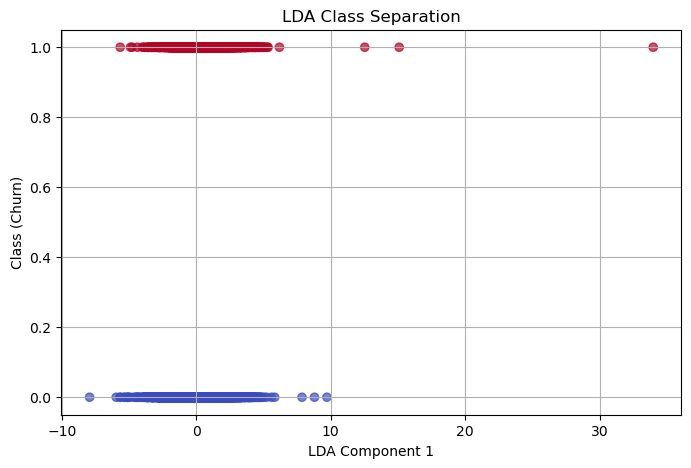

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------
# 1. Standartlaştırma
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 2. LDA (Binary Classification → 1 komponent)
# -----------------------------
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("Orijinal boyut:", X_scaled.shape)
print("LDA sonrası boyut:", X_lda.shape)

# -----------------------------
# 3. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 4. LDA Sınıf Ayrım Grafiği
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(X_lda, y, c=y, cmap="coolwarm", alpha=0.7)
plt.title("LDA Class Separation")
plt.xlabel("LDA Component 1")
plt.ylabel("Class (Churn)")
plt.grid(True)
plt.show()


In [22]:
# 🔹 Ortak feature listesi
final_features = list(set(kbest_features) & set(rf_features) & set(rfe_features) & set(lasso_features))
print("Ortak feature sayısı:", len(final_features))
print("Ortak feature’lar:", final_features)

Ortak feature sayısı: 9
Ortak feature’lar: ['PercChangeMinutes', 'PeakCallsInOut', 'BlockedCalls', 'TotalRecurringCharge', 'CreditRating', 'HandsetPrice', 'UniqueSubs', 'CurrentEquipmentDays', 'MonthlyMinutes']


⚡ SMOTE uygulanıyor...
🚀 SVM modeli eğitiliyor...

🎯 OPTIMIZED SVM MODEL PERFORMANSI
✅ Test Accuracy: 57.51%
✅ Test F1-Score: 58.14%
🔥 Feature Sayısı: 18 (hızlı eğitim)
📊 Train Size: 58,137 | Test Size: 14,535

📊 Detaylı Classification Report:
              precision    recall  f1-score   support

    No Churn       0.58      0.56      0.57      7268
       Churn       0.57      0.59      0.58      7267

    accuracy                           0.58     14535
   macro avg       0.58      0.58      0.57     14535
weighted avg       0.58      0.58      0.57     14535



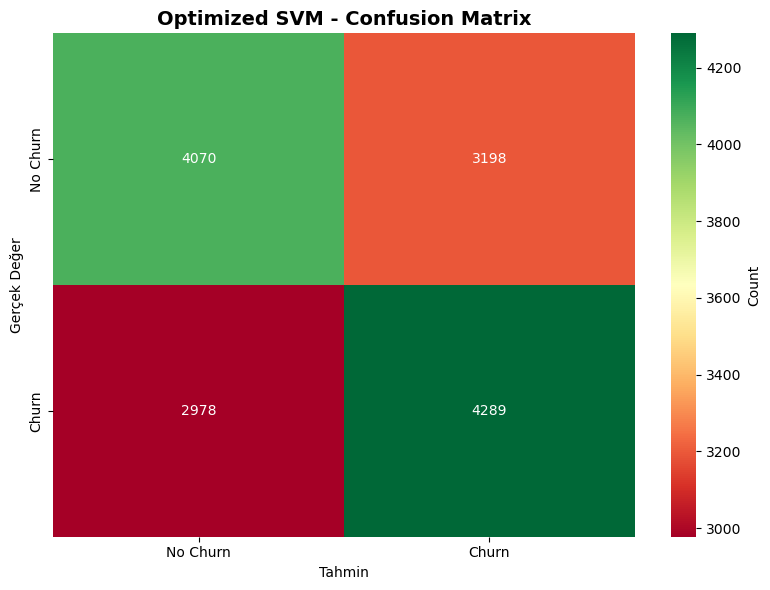

C:\Users\MSİ\AppData\Local\Temp\ipykernel_28212\1838504890.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')


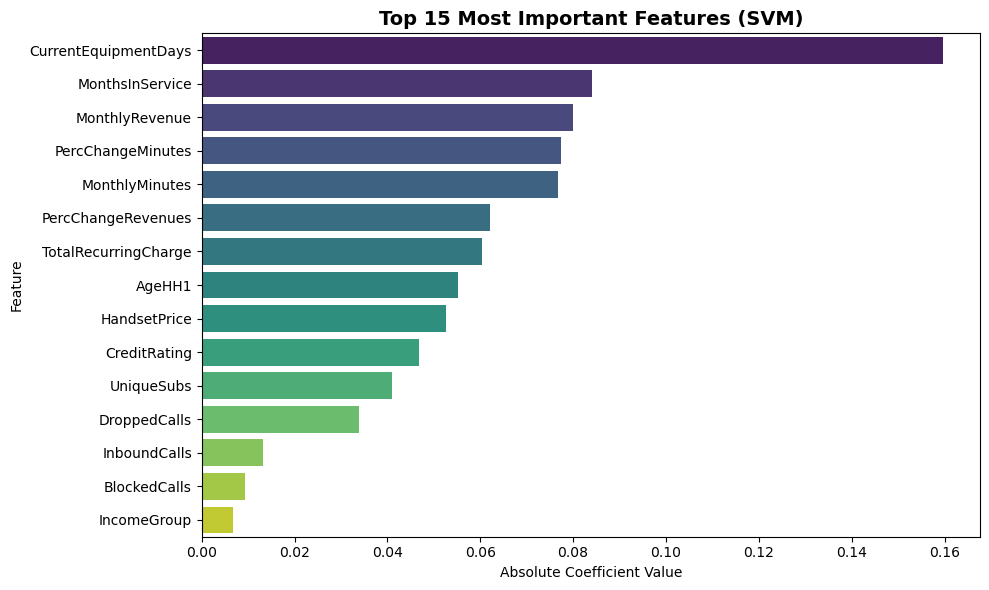


✅ SVM modeli başarıyla eğitildi!


In [23]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 En önemli feature'ları seç (sayıyı azaltarak hızlandırıyoruz)
top_features = ['MonthsInService', 'CurrentEquipmentDays', 'CreditRating', 
                'TotalRecurringCharge', 'MonthlyMinutes', 'PercChangeMinutes',
                'BlockedCalls', 'MonthlyRevenue', 'UniqueSubs', 'PercChangeRevenues',
                'RoamingCalls', 'PeakCallsInOut', 'IncomeGroup', 'OffPeakCallsInOut',
                'DroppedCalls', 'AgeHH1', 'InboundCalls', 'HandsetPrice']

X = df_train[top_features]
y = df_train['Churn']

# 🔹 Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 SMOTE ile sınıf dengesini sağla (doğruluğu artırır)
print("⚡ SMOTE uygulanıyor...")
sm = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# 🔹 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 🔹 LinearSVC (RBF'den 10-100x daha hızlı!)
print("🚀 SVM modeli eğitiliyor...")
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=0.1,                    # Regularization (hız için düşük)
    max_iter=1000,            # Yeterli iterasyon
    class_weight='balanced',
    random_state=42,
    dual=False                # n_samples > n_features için hızlı
)

svm_model.fit(X_train, y_train)

# 🔹 Tahmin
y_pred = svm_model.predict(X_test)

# 🔹 Performans Metrikleri
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n" + "="*60)
print("🎯 OPTIMIZED SVM MODEL PERFORMANSI")
print("="*60)
print(f"✅ Test Accuracy: {acc*100:.2f}%")
print(f"✅ Test F1-Score: {f1*100:.2f}%")
print(f"🔥 Feature Sayısı: {len(top_features)} (hızlı eğitim)")
print(f"📊 Train Size: {len(X_train):,} | Test Size: {len(X_test):,}")
print("\n📊 Detaylı Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# 🔹 Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'],
            cbar_kws={'label': 'Count'})
plt.title('Optimized SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin')
plt.tight_layout()
plt.show()

# 🔹 Feature Importance (LinearSVC için)
feature_importance = pd.DataFrame({
    'Feature': top_features,
    'Importance': np.abs(svm_model.coef_[0])
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Most Important Features (SVM)', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

print("\n✅ SVM modeli başarıyla eğitildi!")

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# 🔹 1️⃣ Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 2️⃣ SMOTE ile dengesiz sınıf dengesi
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 🔹 3️⃣ KNN Parametre Optimizasyonu (GridSearchCV)
param_grid = {
    'n_neighbors': list(range(3, 21, 2)),  # 3,5,7,...19
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn = KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_res, y_train_res)

print("🔹 En iyi parametreler:", grid.best_params_)

# 🔹 4️⃣ Model Eğitimi ve Tahmin
best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# 🔹 5️⃣ Performans Değerlendirme
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\n🔹 KNN Test Set Performansı")
print(f"Accuracy: {acc_knn*100:.2f}%")
print(f"F1-Score: {f1_knn*100:.2f}%")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))


🔹 En iyi parametreler: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

🔹 KNN Test Set Performansı
Accuracy: 76.09%
F1-Score: 79.22%

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72      7268
           1       0.70      0.91      0.79      7267

    accuracy                           0.76     14535
   macro avg       0.79      0.76      0.76     14535
weighted avg       0.79      0.76      0.76     14535

